In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('Hitters.csv')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [59]:
X = df[["CRuns","Assists"]]

# X = X.values.reshape(-1,1)

X.shape

(322, 2)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:

Z = linkage(X_scaled, method='ward')

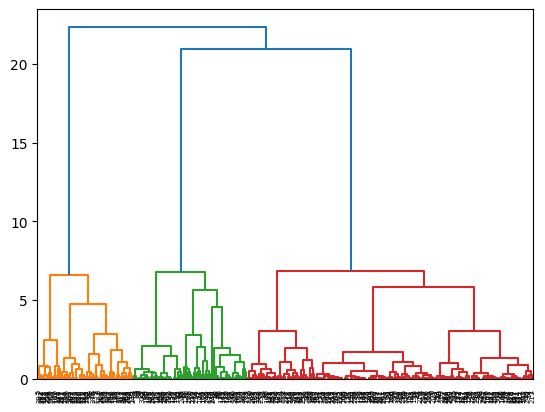

In [62]:
dendrogram(Z)
plt.show()

In [63]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')

pred = agg.fit_predict(X)

In [64]:
pred

array([2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 0,
       1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2,

In [65]:
df['cluster'] = pred
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,cluster
0,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,NaN,A,2
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,2
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,2
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,0
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,311,138,N,E,325,9,3,700.0,N,0
318,492,136,5,76,50,94,12,5511,1511,39,...,451,875,A,E,313,381,20,875.0,A,1
319,475,126,3,61,43,52,6,1700,433,7,...,93,146,A,W,37,113,7,385.0,A,2
320,573,144,9,85,60,78,8,3198,857,97,...,420,332,A,E,1314,131,12,960.0,A,0


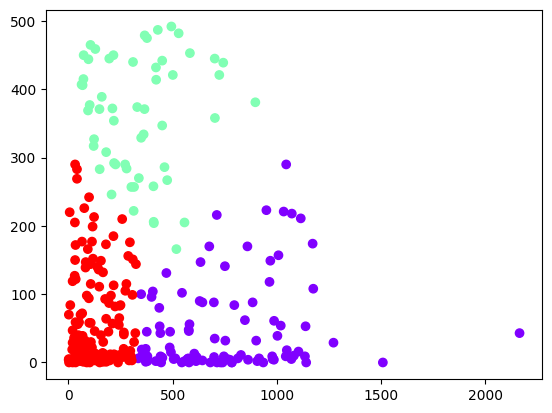

In [67]:
plt.scatter(df['CRuns'], df['Assists'], c=df['cluster'], cmap='rainbow')